# indian diabetes predection

### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



### Pima Indians Diabetes Database
#### Predict the onset of diabetes based on diagnostic measures

### import packages

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### split train and test 

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


### Feature Scaling

In [119]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
dataset.shape

(768, 9)

In [8]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5,1,'data_train.corr()')

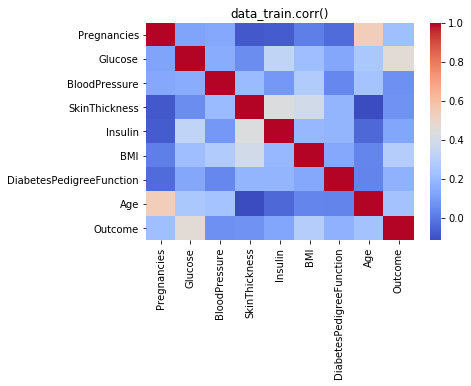

In [68]:
sns.heatmap(dataset.corr(),cmap='coolwarm',xticklabels=True)
plt.title('data_train.corr()')

### Fitting Logistic Regression to the Training set

In [120]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


## Predicting the Test set results

In [28]:
y_pred = classifier.predict(X_test)


## Confusion matrix for predection

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [122]:
cm

array([[148,  23],
       [ 41,  44]])

#### 14,39 incorrect predections

## Visualising the Training set results

In [123]:
one = 0
for i in y_test:
    if i == 1:
        one =  one + 1

In [124]:
zero = 0
for i in y_test:
    if i == 0:
        zero =  zero + 1

In [125]:
pie_list = [one,zero]
lable = ["Diabetes","NO Diabetes"]

([<matplotlib.patches.Wedge at 0x7f30a12ea3c8>,
 [Text(0.553892,0.95037,'Diabetes'), Text(-0.553892,-0.95037,'NO Diabetes')],
 [Text(0.302123,0.518384,'33.2%'), Text(-0.302123,-0.518384,'66.8%')])

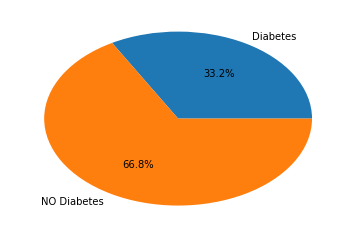

In [126]:
plt.pie(pie_list,labels=lable, autopct='%1.1f%%')

## predection 

In [64]:
one = 0
for i in y_pred:
    if i == 1:
        one =  one + 1
        

zero = 0
for i in y_pred:
    if i == 0:
        zero =  zero + 1

In [65]:
pie_list = [one,zero]
lable = ["Diabetes","NO Diabetes"]

([<matplotlib.patches.Wedge at 0x7f30a1a9f550>,
 [Text(0.815046,0.738715,'Diabetes'), Text(-0.815046,-0.738715,'NO Diabetes')],
 [Text(0.444571,0.402935,'23.4%'), Text(-0.444571,-0.402935,'76.6%')])

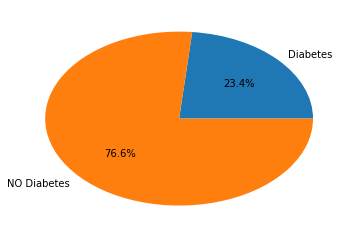

In [66]:

plt.pie(pie_list,labels=lable, autopct='%1.1f%%')


## predection using K-Nearest Neighbors (K-NN)

#### fitting dataset for knn

In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### predect the outcome

In [70]:
y_pred = classifier.predict(X_test)

### confusion matrix

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [72]:
cm


array([[146,  25],
       [ 43,  42]])

### visualize 

([<matplotlib.patches.Wedge at 0x7f30a1e7bda0>,
 [Text(0.748661,0.80592,'Diabetes'), Text(-0.748661,-0.80592,'NO Diabetes')],
 [Text(0.408361,0.439593,'26.2%'), Text(-0.408361,-0.439593,'73.8%')])

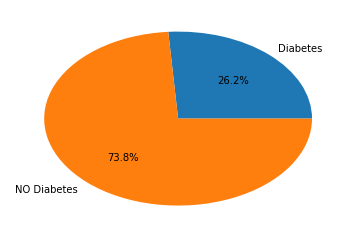

In [73]:
one = 0
for i in y_pred:
    if i == 1:
        one =  one + 1
        

zero = 0
for i in y_pred:
    if i == 0:
        zero =  zero + 1
        
pie_list = [one,zero]
lable = ["Diabetes","NO Diabetes"]

plt.pie(pie_list,labels=lable, autopct='%1.1f%%')


## predict with SVM


### Fitting SVM to the Training set

In [74]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


### Predicting the Test set results

In [75]:
y_pred = classifier.predict(X_test)


### confusion matrix

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [77]:
cm

array([[154,  17],
       [ 39,  46]])

### visualize 

([<matplotlib.patches.Wedge at 0x7f30a1bf8828>,
 [Text(0.787304,0.768214,'Diabetes'), Text(-0.787304,-0.768214,'NO Diabetes')],
 [Text(0.429438,0.419026,'24.6%'), Text(-0.429438,-0.419026,'75.4%')])

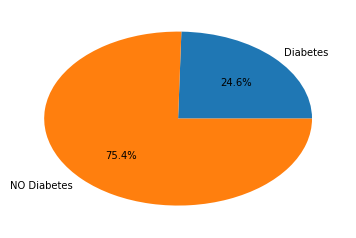

In [79]:
one = 0
for i in y_pred:
    if i == 1:
        one =  one + 1
        

zero = 0
for i in y_pred:
    if i == 0:
        zero =  zero + 1
        
pie_list = [one,zero]
lable = ["Diabetes","NO Diabetes"]

plt.pie(pie_list,labels=lable, autopct='%1.1f%%')

## predection Decision Tree 

### Fitting Decision Tree Classification to the Training set

In [93]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Predicting the Test set results

In [94]:
y_pred = classifier.predict(X_test)

### confusion matrix


In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [96]:
cm

array([[134,  37],
       [ 42,  43]])

### visualize 

([<matplotlib.patches.Wedge at 0x7f30a1733898>,
 [Text(0.611127,0.914617,'Diabetes'), Text(-0.611127,-0.914617,'NO Diabetes')],
 [Text(0.333342,0.498882,'31.2%'), Text(-0.333342,-0.498882,'68.8%')])

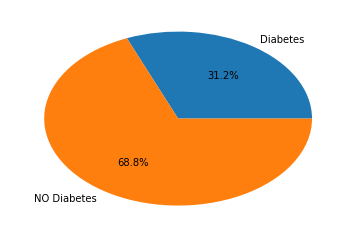

In [97]:
one = 0
for i in y_pred:
    if i == 1:
        one =  one + 1
        

zero = 0
for i in y_pred:
    if i == 0:
        zero =  zero + 1
        
pie_list = [one,zero]
lable = ["Diabetes","NO Diabetes"]

plt.pie(pie_list,labels=lable, autopct='%1.1f%%')

# predect with Random forest

### Fitting Random Forest Classification to the Training set

In [98]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicting the Test set results

In [99]:
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix

In [100]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [101]:
cm

array([[148,  23],
       [ 45,  40]])

([<matplotlib.patches.Wedge at 0x7f30a166d748>,
 [Text(0.787304,0.768214,'Diabetes'), Text(-0.787304,-0.768214,'NO Diabetes')],
 [Text(0.429438,0.419026,'24.6%'), Text(-0.429438,-0.419026,'75.4%')])

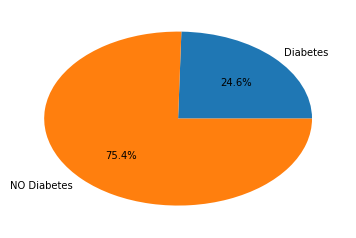

In [102]:
one = 0
for i in y_pred:
    if i == 1:
        one =  one + 1
        

zero = 0
for i in y_pred:
    if i == 0:
        zero =  zero + 1
        
pie_list = [one,zero]
lable = ["Diabetes","NO Diabetes"]

plt.pie(pie_list,labels=lable, autopct='%1.1f%%')

# Predict with kernal svm

### Fitting Kernel SVM to the Training set

In [108]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 10)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

### Predicting the Test set results

In [109]:
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [112]:
cm

array([[171,   0],
       [ 85,   0]])

([<matplotlib.patches.Wedge at 0x7f30a1343860>,
 [Text(1.1,0,'Diabetes'), Text(-1.1,1.34711e-16,'NO Diabetes')],
 [Text(0.6,0,'0.0%'), Text(-0.6,7.34788e-17,'100.0%')])

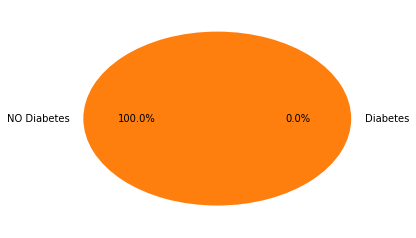

In [113]:
one = 0
for i in y_pred:
    if i == 1:
        one =  one + 1
        

zero = 0
for i in y_pred:
    if i == 0:
        zero =  zero + 1
        
pie_list = [one,zero]
lable = ["Diabetes","NO Diabetes"]

plt.pie(pie_list,labels=lable, autopct='%1.1f%%')

# Predict with Naive Bayes

### Fitting Naive Bayes to the Training set

In [114]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None)


### Predicting the Test set results

In [115]:
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [117]:
cm

array([[148,  23],
       [ 41,  44]])

([<matplotlib.patches.Wedge at 0x7f30a131e390>,
 [Text(0.748661,0.80592,'Diabetes'), Text(-0.748661,-0.80592,'NO Diabetes')],
 [Text(0.408361,0.439593,'26.2%'), Text(-0.408361,-0.439593,'73.8%')])

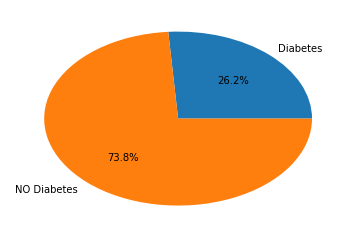

In [118]:
one = 0
for i in y_pred:
    if i == 1:
        one =  one + 1
        

zero = 0
for i in y_pred:
    if i == 0:
        zero =  zero + 1
        
pie_list = [one,zero]
lable = ["Diabetes","NO Diabetes"]

plt.pie(pie_list,labels=lable, autopct='%1.1f%%')